# K-NN Classifier Implementation

### 1. Loading and Preprocessing the Dataset

In [3]:
import numpy as np
import pandas as pd

In [4]:
# Load the dataset
car_data = pd.read_csv(r"C:\Users\guntu\Downloads\car_data.csv")

##### Drop 'User ID' and encode 'Gender' column as 0 (Female) and 1 (Male)

In [6]:
car_data['Gender'] = car_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
car_data = car_data.drop('User ID', axis=1)


In [7]:
# Split data into features (X) and target (y)
X = car_data[['Gender', 'Age', 'AnnualSalary']].values
y = car_data['Purchased'].values

### 2. Splitting the Data into Train and Test Sets

In [9]:
# Function to split data into train and test sets
def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)


### 3. Implementing the K-NN Classifier

In [11]:
# Euclidean distance calculation
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [12]:
# K-NN algorithm without using external libraries like Counter
def knn_classifier(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        # Compute distances from the test point to all training points
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        
        # Get the indices of the k-nearest neighbors
        k_indices = np.argsort(distances)[:k]
        
        # Get the corresponding labels of the nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]
        
        # Manual majority voting
        label_count = {}
        for label in k_nearest_labels:
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1
        
        # Determine the class with the highest count (majority voting)
        majority_class = max(label_count, key=label_count.get)
        y_pred.append(majority_class)
    
    return np.array(y_pred)


### 4. Evaluating the Model (Accuracy and Confusion Matrix)

In [14]:
# Function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Function to compute confusion matrix
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])


In [15]:
# Test the K-NN Classifier with k=5
k = 5
y_pred = knn_classifier(X_train, y_train, X_test, k)

# Compute accuracy 
accuracy = compute_accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.81


In [16]:
# Compute  confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[104  12]
 [ 26  58]]


### 5. Examining the Effect of K on Accuracy

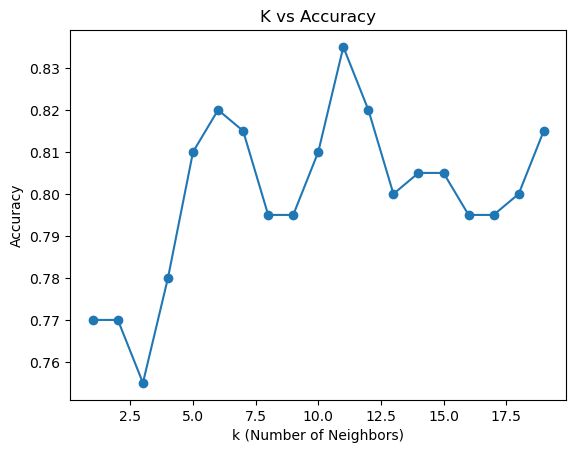

In [18]:
import matplotlib.pyplot as plt
# Test the K-NN Classifier for different values of k and store the accuracies
k_values = range(1, 20)
accuracies = []

for k in k_values:
    y_pred = knn_classifier(X_train, y_train, X_test, k)
    accuracy = compute_accuracy(y_test, y_pred)
    accuracies.append(accuracy)

# Plot k vs accuracy
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()

In [19]:
# Find the best k for maximum accuracy
best_k = k_values[np.argmax(accuracies)]
print(f"Best value of k: {best_k}")

Best value of k: 11
